## Stochastic Hydrology Assignment 3

In [26]:
import numpy as np
import HW1_utils
from astropy.stats import bootstrap as bootstrap

In [35]:
# load data of annual maxima at Azibe Soltane on the Sebou River in Morocco
maxQ = np.loadtxt('Table6.2.csv', skiprows=1, delimiter = ',', usecols=[1])

### Problem 1

In [3]:
# (a) fit a 3-parameter log-normal using MLE and estimate the 100-yr and 500-yr floods 
sigma, tau, mu = HW1_utils.fitLN(maxQ, 'MLE', 3)
q_100 = HW1_utils.findLNreturnPd(sigma, tau, mu, 100)
q_500 = HW1_utils.findLNreturnPd(sigma, tau, mu, 500)

In [4]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 1000)
q_100_vec = np.zeros(1000)
q_500_vec = np.zeros(1000)
for i in range(1000):
    sigma, tau, mu = HW1_utils.fitLN(samples[i,:], 'MLE',3)
    q_100_vec[i] = HW1_utils.findLNreturnPd(sigma, tau, mu, 100)
    q_500_vec[i] = HW1_utils.findLNreturnPd(sigma, tau, mu, 500)

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*1000)]
q_100_upper = q_100_vec[int(1 - alpha/2*1000)]

q_500_lower = q_500_vec[int(alpha/2*1000)]
q_500_upper = q_500_vec[int(1 - alpha/2*1000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(89052.99028691257, 430946533.78626317, 1042765.2667005218, 41061042946.11593)

In [5]:
# (b) fit a 2-parameter Gamma with MOM and estimate the 100-yr and 500-yr floods
alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2 = HW1_utils.fitGamma(maxQ, 'MOM', 2)
q_100 = HW1_utils.findGammaReturnPd(alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2, 100)
q_500 = HW1_utils.findGammaReturnPd(alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2, 500)

In [6]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2 = HW1_utils.fitGamma(samples[i,:], 'MOM',2)
    q_100_vec[i] = HW1_utils.findGammaReturnPd(alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2, 100)
    q_500_vec[i] = HW1_utils.findGammaReturnPd(alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2, 500)

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(3241.6909182437957, 4651.990319575645, 3879.570020605855, 5725.601748533206)

In [7]:
# (c) fit a 2-parameter Gamma with MLE and estimate the 100-yr and 500-yr floods
alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2 = HW1_utils.fitGamma(maxQ, 'MLE', 2)
q_100 = HW1_utils.findGammaReturnPd(alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2, 100)
q_500 = HW1_utils.findGammaReturnPd(alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2, 500)

In [8]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2 = HW1_utils.fitGamma(samples[i,:], 'MLE',2)
    q_100_vec[i] = HW1_utils.findGammaReturnPd(alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2, 100)
    q_500_vec[i] = HW1_utils.findGammaReturnPd(alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2, 500)

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(3194.168298125855, 4776.045259056647, 3817.1879893347345, 5895.027960182875)

In [9]:
# (d) fit a Log-Pearson Type 3 with MOM and estimate the 100-yr and 500-yr floods
alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(np.log(maxQ), 'MOM', 3)
q_100 = np.exp(-HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 100/99))
q_500 = np.exp(-HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 500/499))

In [10]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(np.log(samples[i,:]), 'MLE',2)
    q_100_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 100))
    q_500_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 500))

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(3849.2870867411425, 6832.6714353071275, 5120.625398229102, 10298.196262060008)

In [11]:
# (e) fit a Log-Pearson Type 3 with MLE and estimate the 100-yr and 500-yr floods
alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE = HW1_utils.fitGamma(np.log(maxQ), 'MLE', 3)
q_100 = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE, 100))
q_500 = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE, 500))

In [12]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE = HW1_utils.fitGamma(np.log(samples[i,:]), 'MLE',2)
    q_100_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE, 100))
    q_500_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE, 500))

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(3833.7762616958394, 6837.250134549028, 5074.563375282942, 10277.3123640636)

In [13]:
# (f) fit a Gumbel with MLE and estimate the 100-yr and 500-yr floods
xi_Gumbel, alpha_Gumbel = HW1_utils.fitGumbel(maxQ, 'MLE')
q_100 = HW1_utils.findGumbelReturnPd(xi_Gumbel, alpha_Gumbel, 100)
q_500 = HW1_utils.findGumbelReturnPd(xi_Gumbel, alpha_Gumbel, 500)

In [14]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    xi_Gumbel, alpha_Gumbel = HW1_utils.fitGumbel(samples[i,:], 'MLE')
    q_100_vec[i] = HW1_utils.findGumbelReturnPd(xi_Gumbel, alpha_Gumbel, 100)
    q_500_vec[i] = HW1_utils.findGumbelReturnPd(xi_Gumbel, alpha_Gumbel, 500)

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(3295.172390235951, 4846.405364578315, 4082.5558745948438, 6085.226597264731)

In [36]:
# (g) fit a GEV with MLE and estimate the 100-yr and 500-yr floods
kappa_GEV, xi_GEV, alpha_GEV = HW1_utils.fitGEV(maxQ, 'MLE')
q_100 = HW1_utils.findGEVreturnPd(kappa_GEV, xi_GEV, alpha_GEV, 100)
q_500 = HW1_utils.findGEVreturnPd(kappa_GEV, xi_GEV, alpha_GEV, 500)

In [37]:
# estimate 95% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    kappa_GEV, xi_GEV, alpha_GEV = HW1_utils.fitGEV(samples[i,:], 'MLE')
    q_100_vec[i] = HW1_utils.findGEVreturnPd(kappa_GEV, xi_GEV, alpha_GEV, 100)
    q_500_vec[i] = HW1_utils.findGEVreturnPd(kappa_GEV, xi_GEV, alpha_GEV, 500)

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.05 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

C:\Users\Choi\Anaconda3\envs\python36\lib\site-packages\scipy\stats\_continuous_distns.py:2364: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


(3102.842158675494,
 222512004278461.2,
 3345.6644553672677,
 1.5782641729894736e+19)

### Problem 2

In [5]:
import scipy.stats as ss
import numpy as np
import HW1_utils

In [7]:
# load data of annual maxima at Azibe Soltane on the Sebou River in Morocco
maxQ = np.loadtxt('Table6.2.csv', skiprows=1, delimiter = ',', usecols=[1])

In [8]:
# parameters of LP3 distribution with MOM
alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(np.log(maxQ), 'MOM', 3)
alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM

(35.18264605338997, 10.538635621795176, -10.544433787682864)

In [9]:
# calculate skew
skew = ss.skew(np.log(maxQ), bias=False)
skew

-0.3371830587626418

In [10]:
# set number of data
n = 40

In [11]:
varG = ((6.0*(n-2))/((n+1.0)*(n+3.0)))
varG

0.12932501418037437

In [12]:
# calculate z value for 100 year and 500 year
z100 = ss.norm.ppf(0.99)
z500 = ss.norm.ppf(0.998)
z100, z500

(2.3263478740408408, 2.878161739095483)

In [13]:
# calculate the standard P3 quantile (frequency factor) with cumulative probability for skew coefficient
Kp100 = (2/skew)*(1+(skew*z100/6)-((skew)**2)/36)**3-2/skew
Kp500 = (2/skew)*(1+(skew*z500/6)-((skew)**2)/36)**3-2/skew
Kp100, Kp500

(2.07777801637237, 2.477073154737453)

In [14]:
dKp_100 = (z100**2-1)*(1-3*(skew/6)**2)/6 + (z100**3-6*z100)*skew/54 + 2*z100/3*(skew/6)**3
dKp_500 = (z500**2-1)*(1-3*(skew/6)**2)/6 + (z500**3-6*z500)*skew/54 + 2*z500/3*(skew/6)**3
dKp_100, dKp_500

(0.7366166703265938, 1.1610831851047072)

In [17]:
eta100 = np.sqrt((1+skew*Kp100+0.5*(1+0.75*(skew)**2)*Kp100**2+n*varG*(dKp_100)**2)/(1+0.5*z100**2))
eta500 = np.sqrt((1+skew*Kp500+0.5*(1+0.75*(skew)**2)*Kp500**2+n*varG*(dKp_500)**2)/(1+0.5*z500**2))
eta100, eta500

(1.2125689697465816, 1.4268296454904834)

In [18]:
mean = np.mean(np.log(maxQ))
mean

7.202027249851352

In [19]:
mean100 = mean + Kp100*np.std(np.log(maxQ), ddof = 1)
mean500 = mean + Kp500*np.std(np.log(maxQ), ddof = 1)
mean100, mean500

(8.370827060351658, 8.595440122178934)

In [20]:
zeta_lower_100 = 1.896
zeta_upper_100 = 2.941
zeta_lower_500 = 2.375
zeta_upper_500 = 3.609

In [21]:
# estimate 90% confidence intervals on 100-yr floods
lower_value_100 = np.exp(mean100 + eta100*(zeta_lower_100 - z100)*np.std(np.log(maxQ), ddof = 1))
upper_value_100 = np.exp(mean100 + eta100*(zeta_upper_100 - z100)*np.std(np.log(maxQ), ddof = 1))
lower_value_100, upper_value_100

(3220.4848131966173, 6568.7621412869275)

In [23]:
# estimate 90% confidence intervals on 500-yr floods
lower_value_500 = np.exp(mean500 + eta500*(zeta_lower_500 - z500)*np.std(np.log(maxQ), ddof = 1))
upper_value_500 = np.exp(mean500 + eta500*(zeta_upper_500 - z500)*np.std(np.log(maxQ), ddof = 1))
lower_value_500, upper_value_500

(3610.4566329952327, 9720.863760892811)

In [24]:
# fit a Log-Pearson Type 3 with MOM and estimate the 100-yr and 500-yr floods
alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(np.log(maxQ), 'MOM', 3)
q_100 = np.exp(-HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 100/99))
q_500 = np.exp(-HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 500/499))

In [27]:
# estimate 90% confidence intervals on 100-yr and 500-yr floods using bootstrapping
samples = bootstrap(maxQ, 10000)
q_100_vec = np.zeros(10000)
q_500_vec = np.zeros(10000)
for i in range(10000):
    alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(np.log(samples[i,:]), 'MLE',2)
    q_100_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 100))
    q_500_vec[i] = np.exp(HW1_utils.findGammaReturnPd(alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM, 500))

q_100_vec = np.sort(q_100_vec)
q_500_vec = np.sort(q_500_vec)

alpha = 0.10 # 95% CI
q_100_lower = q_100_vec[int(alpha/2*10000)]
q_100_upper = q_100_vec[int(1 - alpha/2*10000)]

q_500_lower = q_500_vec[int(alpha/2*10000)]
q_500_upper = q_500_vec[int(1 - alpha/2*10000)]
q_100_lower, q_100_upper, q_500_lower, q_500_upper

(4027.70743363473, 6598.395106937164, 5406.129869218975, 9855.248174485616)

### Problem 3

In [613]:
import numpy as np
from matplotlib import pyplot as plt
import utils_inClass
import pandas as pd

# load data of daily flows on the Potomac at Alexandria
allQ = pd.read_csv('James_river_daily_streamflow.csv')

# convert first column to date
allQ['Date'] = pd.to_datetime(allQ['Date'],format="%Y-%m-%d")
allQ['Flow'] = pd.to_numeric(allQ['Flow'],errors='ignore')

# find year of each data point
allQ['Year'] = allQ['Date'].dt.year
maxQ = allQ.groupby('Year').max()

# fit GEV to maxQ
kappa, xi, alpha = utils_inClass.fitGEV(maxQ['Flow'], 'MOM',)

# (a) estimate 100-yr and 500-yr floods
q_100 = utils_inClass.findGEVreturnPd(kappa, xi, alpha, 100)
q_500 = utils_inClass.findGEVreturnPd(kappa, xi, alpha, 500)
q_100, q_500, kappa, xi, alpha

(172283.5435626202,
 238840.20286764894,
 -0.12468421999210845,
 41913.41260899518,
 20985.585166531793)

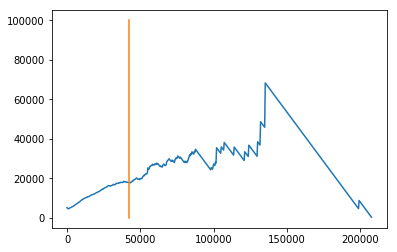

In [614]:
# (b) plot the mean residual life plot
thresholds = np.arange(0, np.max(allQ['Flow']),400)
y = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    flood_indices = np.where(allQ['Flow']>thresholds[i])[0]
    y[i]=np.mean(allQ['Flow'][flood_indices]-thresholds[i])
plt.plot(thresholds, y)
plt.plot([42000, 42000], [0, 100000])

In [615]:
x0 = 42000
# find all peaks over the threshold
peak_indices = np.where(allQ['Flow']>x0)[0]
peak_indices

array([    0,     1,  1416,  1417,  2939,  3120,  3712,  3713,  3714,
        3766,  3767,  3768,  3835,  3992,  3993,  4112,  4128,  4155,
        4186,  4187,  4188,  4478,  4495,  4496,  4590,  4591,  4767,
        4768,  4776,  5435,  5722,  5797,  5798,  5799,  5800,  6437,
        6438,  6443,  6444,  6589,  6665,  7293,  8537,  8583,  8826,
        8830,  8831,  8939,  8962,  9476,  9565, 10024, 10025, 10371,
       10372, 10402, 10403, 10744, 10745, 11114, 11115, 11278, 11875,
       11876, 12235, 12965, 12966, 12970, 12971, 13535, 13687, 14042,
       14043, 14740, 14741, 15498, 15499, 16394, 16395, 16396, 16528,
       16529, 16938, 17043, 17044, 17316, 17430, 17431, 17432, 17537,
       17657, 17658, 17701, 17772, 17773, 17985, 18427, 18431, 18432,
       18433, 19002, 19180, 19181, 19475, 19476, 19477, 19524, 19535,
       19536, 19566, 19567, 19870, 19871, 19872, 19879, 19880, 19969,
       20080, 20286, 21075, 21076, 21376, 21686, 21687, 22314, 22315,
       22316, 22317,

In [616]:
# find only independent peaks
# (c) if more than 1 peak over the threshold within 5 days of each other, pick only the largest
allClusters = []
subCluster = [peak_indices[0]]
for i in range(1,len(peak_indices)):
    if peak_indices[i] - peak_indices[i-1] <= 5:
        subCluster.append(peak_indices[i])
    else:
        allClusters.append(subCluster)
        subCluster = [peak_indices[i]]
        
allClusters.append(subCluster)
        
peaks = np.zeros(len(allClusters))
for i in range(len(allClusters)):
    peaks[i] = np.max(allQ['Flow'][allClusters[i]])
peaks

array([ 68000.,  67700.,  56200.,  43000.,  75200.,  82700.,  47200.,
        84400.,  43800.,  47600.,  46300.,  99400.,  43700.,  53400.,
        53600.,  77200.,  46600.,  49000.,  49900., 107000.,  75400.,
        71800.,  45100., 105000.,  55100.,  47300.,  81600.,  54900.,
        60900.,  55100.,  59600.,  48600.,  50900.,  56400.,  44800.,
        65600.,  51800.,  55800.,  42900.,  55000.,  58300.,  49700.,
        65200.,  45100.,  58400., 135000.,  56200.,  49300.,  56800.,
        43600., 208000.,  67500.,  53000.,  43800.,  53700.,  73400.,
        87600.,  53300.,  54900.,  85100.,  51400.,  51400.,  43600.,
        86700.,  55100.,  54600.,  51400.,  54000.,  64100.,  48200.,
        60900., 199000.,  49100., 124000.,  71200.,  67800.,  63600.,
        44100.,  43600., 102000.,  69400.,  52900.,  55200.,  68600.,
        74100., 121000.,  42700., 114000.,  57400.,  68100.,  54100.,
        50900.,  60000.,  51300.,  83600.,  44100.,  46000.,  45900.,
        57800.,  437

In [617]:
# (d) Estimate the Poisson arrival rate of floods over the threshold.
llambda = len(peaks)/len(maxQ)
llambda

1.1770833333333333

In [618]:
# (e) fit a GPD to the peaks over the threshold
kappa, x0, alpha = utils_inClass.fitGPD(peaks, x0, 'MOM')
kappa, x0, alpha

(-0.18123791037792908, 42000, 17421.5183034275)

In [619]:
# (f) estimate 100-yr, 500 flood 
# find equivalent parameters of GEV
if kappa == 0:
    xi = x0 + alpha*np.log(llambda)
else:
    xi = x0 + alpha*(1-llambda**(-kappa))/kappa
    
alpha_star = alpha*llambda**(-kappa)

q_100_POT = utils_inClass.findGEVreturnPd(kappa, xi, alpha_star, 100)
q_500_POT = utils_inClass.findGEVreturnPd(kappa, xi, alpha_star, 500)
q_100_POT, q_500_POT

(173778.11959855363, 251188.9331079195)